### Part 1
#### About the Data
"The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions."

"It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."

Here's the link to the dataset:https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Overview
In Part 1 of this notebook, I am going to take a closer look at the data! 
According to the dataset discription, the data is highly imbalanced!(way less fradulent activities than regular!). Also, all columns have been scaled except the  transaction 'Amount' and 'Time' columns!

I'm going to select and build the best suited model to be able to detect the credit frauds in Part 2 on this notebook! Stay tuned!

In [1]:
#importing vital libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

#classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#other libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
#path to the file
path =(r"C:\Users\nesha\Desktop\creditcard.csv")
credit = pd.read_csv(path)

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
credit.isnull().sum().max()

0

Thankfully there are no null values in the dataset. 
The average transaction amount is 88.34 USD and the maximum transaction is 2,5691.16 USD (this column should be scaled!)
Time column has a large standard deviation as well, thus it is another great candidate to be scaled!

In [6]:
#checking the Class column
class_name = { 0: 'Not Fraud', 1: 'Fraud'}
print(credit.Class.value_counts().rename(index= class_name))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud - 1: Fraud)')

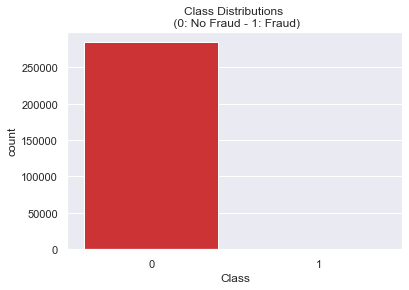

In [7]:
sns.countplot('Class', data=credit, palette= 'Set1')
plt.title('Class Distributions \n (0: No Fraud - 1: Fraud)', fontsize=12)

The "fraud" data is only 0.17% of the overall data which can affect the model predictions regardless of which algorithm is chosen!! A sub data is needed to include a more balanced data for the "Class" column!

(0.0, 172792.0)

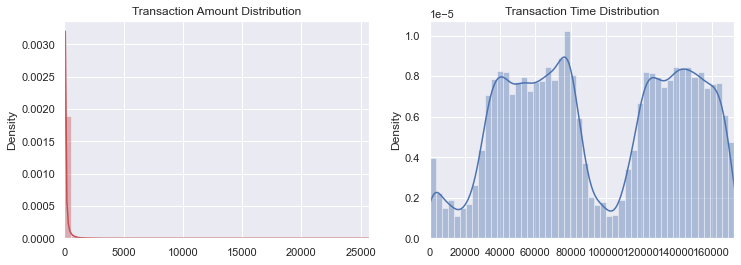

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

amount= credit['Amount'].values
time= credit['Time'].values

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount Distribution', fontsize=12)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Transaction Time Distribution', fontsize=12)
ax[1].set_xlim([min(time), max(time)])

In [9]:
#all other columns are scaled except Time and Amount! Here we are going to scale these two columns as well!
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

credit['scaled_amount'] = std_scaler.fit_transform(credit['Amount'].values.reshape(-1,1))
credit['scaled_time'] = std_scaler.fit_transform(credit['Time'].values.reshape(-1,1))

credit.drop(['Time','Amount'], axis=1, inplace=True)

Text(0.5, 1.0, 'Transaction Time Distribution')

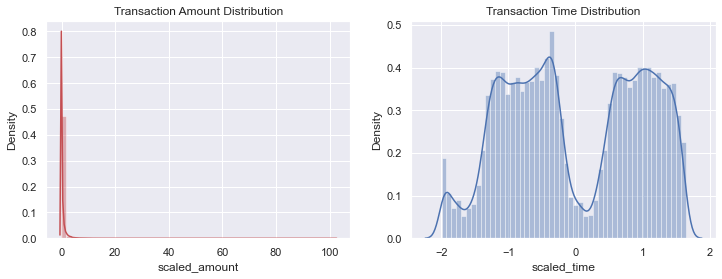

In [10]:
#lets look at the distributions post-scaling!

fig, ax = plt.subplots(1, 2, figsize=(12,4))

amount= credit['scaled_amount']
time= credit['scaled_time']

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount Distribution', fontsize=12)

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Transaction Time Distribution', fontsize=12)

In [11]:
#setting the X and y(same as in Part 1)
X = credit.loc[:, credit.columns != 'Class']
y = credit['Class']

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

stratified = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in stratified.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    balanced_Xtrain, balanced_Xtest = X.iloc[train_index], X.iloc[test_index]
    balanced_ytrain, balanced_ytest = y.iloc[train_index], y.iloc[test_index]
    

balanced_Xtrain, balanced_Xtest, balanced_ytrain, balanced_ytest = train_test_split(X, y, test_size=0.2, random_state=42)


# Turn into an array
balanced_Xtrain = balanced_Xtrain.values
balanced_Xtest = balanced_Xtest.values
balanced_ytrain = balanced_ytrain.values
balanced_ytest = balanced_ytest.values

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [13]:
train_unique_label, train_counts_label = np.unique(balanced_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(balanced_ytest, return_counts=True)
print('-' * 50)

print('Label Distributions: \n')
print(train_counts_label/ len(balanced_ytrain))
print(test_counts_label/ len(balanced_ytest))

--------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


Now I am going to explore the Random Under Sampling technique; which means removing data to get a 50/50 ratio of both classes! Using this technique inclnudes some information loss risks, which might mean losing prediction accuracy! However it might be a better option that training our model on an imbalanced data and overfitting it!!!

In [14]:
#making the skewed "Class" column normally distributed by making the number of "fraud" and "not fraud" instances equal!

#shuffling the data before creating the subsamples
sub_credit = credit.sample(frac=1)

#amount of fraud classes 492 rows
fraud_credit = credit.loc[credit['Class'] == 1]
non_fraud_credit = credit.loc[credit['Class'] == 0][:492]

normal_distributed_credit = pd.concat([fraud_credit, non_fraud_credit])

#shuffling dataframe rows
new_credit = normal_distributed_credit.sample(frac=1, random_state=3)

new_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
79835,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,-3.076699,...,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1,-0.346233,-0.771033
248,1.274967,-0.778783,1.162453,-0.180425,-1.532631,-0.101808,-1.185738,0.076522,-0.265080,0.679448,...,0.003713,-0.040272,-0.103367,0.129752,0.605919,0.032167,0.036730,0,-0.181711,-1.993045
14197,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,-9.222826,...,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1,0.046539,-1.465271
190,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,3.351079,...,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,0,-0.178473,-1.993951
81186,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,-3.288204,...,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,1,-0.170757,-0.757914


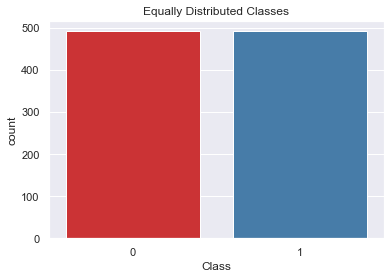

In [15]:
#lets visualize the new_credit 
sns.countplot('Class', data=new_credit , palette= 'Set1')
plt.title('Equally Distributed Classes', fontsize=12)
plt.show()

In [16]:
#setting X and y in the new_credit dataframe
X = new_credit.drop('Class', axis=1)
y = new_credit['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (787, 30)
y_train shape: (787,)
X_test shape: (197, 30)
y_test shape: (197,)


In [17]:
#turning the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [18]:
#let's compared models based accuracy on the training set
classifiers = {
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}


from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__,
          "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 100.0 % accuracy score


As you can see all models have a very high accuracy score on the training set!

I'm going to pick the Random Forest Classifier and tune its hyperparameters

In [19]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3)
grid_tree.fit(X_train, y_train)

# tree best estimator
print(grid_tree.best_estimator_)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [20]:
#Let's use the tuned DT and make some predictions

dt=DecisionTreeClassifier(max_depth=1, min_samples_leaf=5)

dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [21]:
#calculating the F1 and recall scores for the Random Forest model
f1_score = round(f1_score(y_test, y_pred), 2)
recall_score = round(recall_score(y_test, y_pred), 2)
print("Sensitivity/Recall for Decision Tree Model : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Decision Tree: {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Decision Tree Model : 1.0
F1 Score for Decision Tree: 1.0


In [22]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

tree_pred = cross_val_predict(dt, X_train, y_train, cv=5)

In [23]:
from sklearn.metrics import roc_auc_score

print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Decision Tree Classifier:  0.9987531172069826


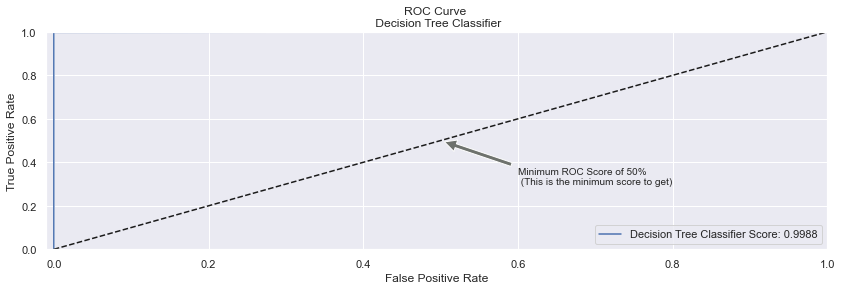

In [24]:
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve(tree_fpr, tree_tpr):
    plt.figure(figsize=(14,4))
    plt.title('ROC Curve \n Decision Tree Classifier', fontsize=12)
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve(tree_fpr, tree_tpr)
plt.show()

Now let's try out Decision Tree model to predict using the original imbalance data!!

In [25]:
#bringing back the full data (credit)
X = credit.loc[:, credit.columns != 'Class']
y = credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train shape: (227845, 30)
y_train shape: (227845,)
X_test shape: (56962, 30)
y_test shape: (56962,)


In [26]:
#fittin
y_pred=dt.predict(X_test)

In [27]:
tree_pred_full_data = cross_val_predict(dt, X_train, y_train, cv=5)

print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred_full_data))

Decision Tree Classifier:  0.8493051423855497


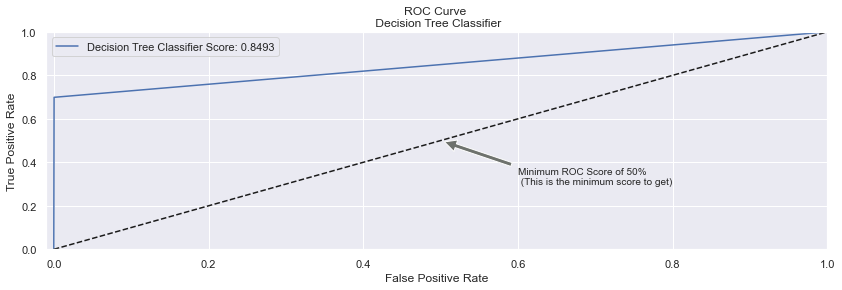

In [28]:
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred_full_data)


def graph_roc_curve(tree_fpr, tree_tpr):
    plt.figure(figsize=(14,4))
    plt.title('ROC Curve \n Decision Tree Classifier', fontsize=12)
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred_full_data)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve(tree_fpr, tree_tpr)
plt.show()

The ROC cuve score using the full imbalance data 84.9% which is obviously lower than when we used the Random Under Sampling technique!

#### Conclusion

In this notebook, some EDA was peformed on the credit dataset! Based on the data discription and also the analysis we found out that the labels (fraud and not fraud) are extremely skewed! In addition we saw that all columns have been scaled except for the transactions "Amount" and "Time". 
The none scaled columns were scaled using the StandardScalar package from Scikit-learn library! The Random Under Sampling method was also used to create a sub-dataset that has a 50/50 ratio of our binary classes!
The Decision Tree Classifier was selected, and the hyperparameter were tuned. The model was trained on the balanced sub-dataset, but we made some predictions using the full (imbalance) dataset. At the end, the ROC AUC score turned out to be 84.9% (0.8493).


#### Recommendations

* More EDA analysis shall be done (e.g. detecting outliers and eliminating them!)
* A more robust scaling method can be used - here I used StandardScalar, but I suggest trying RobustScalar as well!
* Using correlation matrices to identify the most influencial attributes! Here we have no idea what the V1,V2 etc are since CPA have reduced them for privacy purposes! But using correlation matrices can help identify the importance of each and add to the accuracy of the models!
* Here I decided to go with the Decision Tree Classifier but other Classifiers such as Random Fores and Gradient Boosting might perform even better after tuning!

Hope you enjoyed this notebook!
Cheers!